In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visualization. Exploratory Data Analysis

In [3]:
coffee_data = pd.read_csv("data/merged_data_cleaned.csv")

In [4]:
coffee_data.head(3)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0


In [5]:
coffee_data.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

In [6]:
coffee_data = coffee_data.drop(columns = ["Unnamed: 0"])

In [7]:
coffee_data.columns = coffee_data.columns.str.replace(".", "_")
coffee_data.columns = coffee_data.columns.str.lower()

In [8]:
coffee_data.columns

Index(['species', 'owner', 'country_of_origin', 'farm_name', 'lot_number',
       'mill', 'ico_number', 'company', 'altitude', 'region', 'producer',
       'number_of_bags', 'bag_weight', 'in_country_partner', 'harvest_year',
       'grading_date', 'owner_1', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [9]:
coffee_data.harvest_year.unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', 'May-August', '2009/2010', '2015',
       '2011', '2016', '2015/2016', '2010', 'Fall 2009', '2017',
       '2009 / 2010', '2010-2011', '2009-2010', '2009 - 2010',
       '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

In [10]:
coffee_data.harvest_year.astype(float, errors = "ignore")

0       2014
1       2014
2        NaN
3       2014
4       2014
        ... 
1334    2016
1335    2016
1336    2014
1337    2013
1338    2013
Name: harvest_year, Length: 1339, dtype: object

In [11]:
coffee_data.harvest_year.str.isnumeric() # returns True if value is numeric

0       True
1       True
2        NaN
3       True
4       True
        ... 
1334    True
1335    True
1336    True
1337    True
1338    True
Name: harvest_year, Length: 1339, dtype: object

In [12]:
coffee_data.harvest_year.str.isnumeric().unique() # returns unique value types

array([True, nan, False], dtype=object)

In [13]:
# returns how much columns are numeric, other type, NaN (missing values)
coffee_data.harvest_year.str.isnumeric().value_counts(dropna = False)

harvest_year
True     1128
False     164
NaN        47
Name: count, dtype: int64

In [14]:
coffee_data.harvest_year.str.isnumeric() == True

0        True
1        True
2       False
3        True
4        True
        ...  
1334     True
1335     True
1336     True
1337     True
1338     True
Name: harvest_year, Length: 1339, dtype: bool

In [15]:
coffee_valid_harvest_years = coffee_data[coffee_data.harvest_year.str.isnumeric() == True]

In [16]:
coffee_valid_harvest_years.harvest_year = coffee_valid_harvest_years.harvest_year.astype(int)

C:\Users\USER\AppData\Local\Temp\ipykernel_15864\595066360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_valid_harvest_years.harvest_year = coffee_valid_harvest_years.harvest_year.astype(int)


In [17]:
# group harvest years by their count:
coffee_valid_harvest_years.groupby("harvest_year").size().sort_values(ascending = False)

harvest_year
2012    354
2014    233
2013    181
2015    129
2016    124
2017     70
2011     26
2010     10
2018      1
dtype: int64

In [18]:
# group harvest_year by their count, starting with the smallest year:
years = coffee_valid_harvest_years.harvest_year.value_counts().sort_index() 

In [19]:
years

harvest_year
2010     10
2011     26
2012    354
2013    181
2014    233
2015    129
2016    124
2017     70
2018      1
Name: count, dtype: int64

## Bar chart for numerical feature:

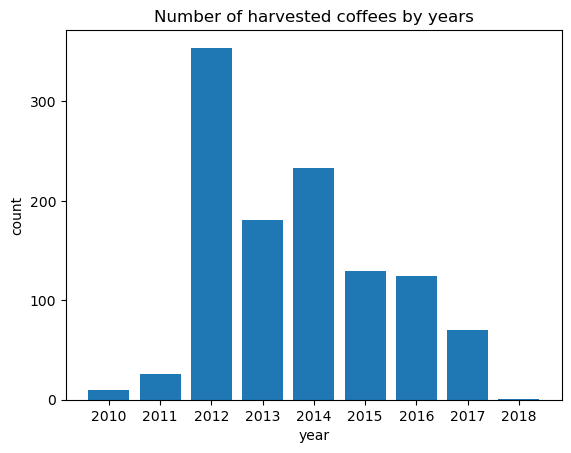

In [20]:
plt.bar(years.index, years)

plt.xticks(range(2010, 2019))
plt.yticks(range(0, 350, 100))
plt.xlabel("year")
plt.ylabel("count")
plt.title("Number of harvested coffees by years")
plt.show()

## Line chart for numerical feature:

It is used to visualize variables over time.

In [21]:
years.idxmax(), years.max()  # index of max value, max value

(2012, 354)

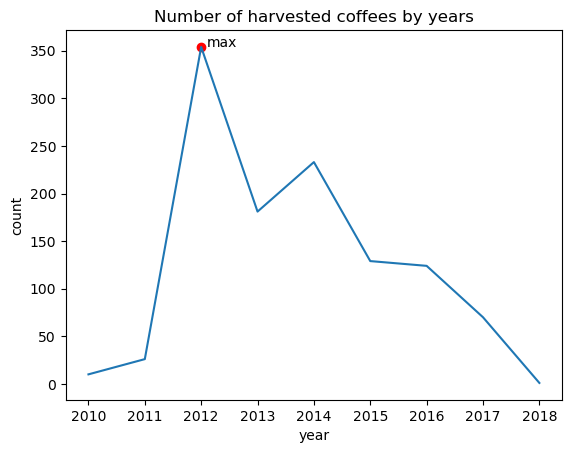

In [22]:
plt.plot(years.index, years)

plt.scatter(years.idxmax(), years.max(), marker = "o", color = "r") # dot on maximum value

plt.annotate("max", (years.idxmax() + 0.1, years.max()))

plt.xlabel("year")
plt.ylabel("count")
plt.title("Number of harvested coffees by years")
plt.show()

## Histogram for numerical feature:

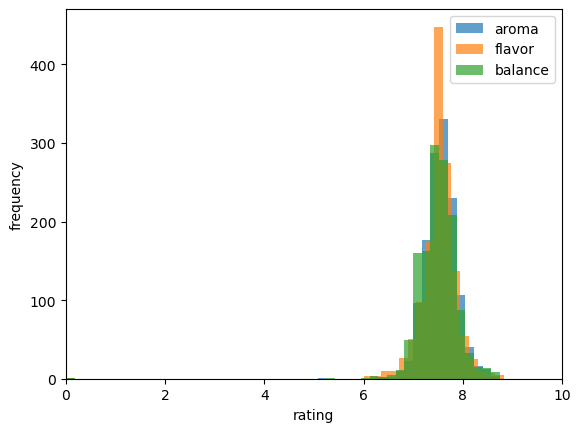

In [52]:
plt.hist(coffee_data.aroma, bins = 50, label = "aroma", alpha = 0.7)
plt.hist(coffee_data.flavor, bins = 50, label = "flavor", alpha = 0.7)
plt.hist(coffee_data.balance, bins = 50, label = "balance", alpha = 0.7)

plt.xlim(0, 10)

plt.xlabel("rating")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [24]:
coffee_data.loc[coffee_data.balance < 6, ["species", "owner","company", "country_of_origin", "balance", "aroma", "flavor"]]

,species,owner,company,country_of_origin,balance,aroma,flavor
1310,Arabica,bismarck castro,cigrah s.a de c.v,Honduras,0.00,0.0,0.00
1335,Robusta,luis robles,robustasa,Ecuador,5.25,7.5,7.67


In [25]:
coffee_data[coffee_data.balance > 0].balance.min() # smallest balance value > 0

5.25

In [26]:
# 5 smallest balance values > 0
coffee_data[coffee_data.balance > 0].nsmallest(5, "balance")[["species", "owner","company", "country_of_origin", "balance", "aroma", "flavor"]]

,species,owner,company,country_of_origin,balance,aroma,flavor
1335,Robusta,luis robles,robustasa,Ecuador,5.25,7.50,7.67
1308,Arabica,"exportadora atlantic, s.a.",exportadora atlantic s.a,Nicaragua,6.08,7.25,6.58
1303,Arabica,cadexsa,cadexsa,Honduras,6.17,6.67,6.50
1304,Arabica,cadexsa,cadexsa,Honduras,6.17,7.00,6.17
1305,Arabica,cadexsa,cadexsa,Honduras,6.17,7.00,6.33


## Bar chart for categorical feature:

In [27]:
coffee_data.owner.value_counts() # group owner by coffee count 

owner
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
alvaro quiros perez                   1
olivia hernandez virves               1
finca las nieves                      1
pedro santos e silva                  1
james moore                           1
Name: count, Length: 315, dtype: int64

In [28]:
one_coffee_owners = coffee_data.owner.value_counts() == 1 # owners with one coffee

In [29]:
one_coffee_owners

owner
juan luis alvarado romero           False
racafe & cia s.c.a                  False
exportadora de cafe condor s.a      False
kona pacific farmers cooperative    False
ipanema coffees                     False
                                    ...  
alvaro quiros perez                  True
olivia hernandez virves              True
finca las nieves                     True
pedro santos e silva                 True
james moore                          True
Name: count, Length: 315, dtype: bool

In [30]:
one_coffee_owners[one_coffee_owners] # get owners with only one coffee

owner
gonzalo hernandez                                     True
ibrahim hussien speciality coffee producer &export    True
case noyale ltd                                       True
shwe yin mar coffee                                   True
francisco a mena                                      True
                                                      ... 
alvaro quiros perez                                   True
olivia hernandez virves                               True
finca las nieves                                      True
pedro santos e silva                                  True
james moore                                           True
Name: count, Length: 172, dtype: bool

In [31]:
# names of the owners with only one coffee (names are in the index)
one_coffee_owners_names = one_coffee_owners[one_coffee_owners].index

In [32]:
one_coffee_owners_names

Index(['gonzalo hernandez',
       'ibrahim hussien speciality coffee producer &export', 'case noyale ltd',
       'shwe yin mar coffee', 'francisco a mena', 'u htun htun',
       'hider abamecha', 'bob mccauley', 'delfina leon shine',
       'kongoni estate',
       ...
       'michael gavina', 'brian beck', 'gladness obed pallangyo',
       'dario cesar galeana sanchez', 'jose daniel cobilt castro',
       'alvaro quiros perez', 'olivia hernandez virves', 'finca las nieves',
       'pedro santos e silva', 'james moore'],
      dtype='object', name='owner', length=172)

In [33]:
# returns entries whose owner has only one coffee:
coffee_data[coffee_data.owner.isin(one_coffee_owners_names)]

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
6,Arabica,hugo valdivia,Peru,NaN,NaN,hvc,NaN,richmond investment-coffee department,NaN,NaN,...,Bluish-Green,0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
9,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,NaN,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,"snnp/kaffa zone,gimbowereda",...,Green,4,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5
10,Arabica,mohammed lalo,Ethiopia,fahem coffee plantation,NaN,NaN,NaN,fahem coffee plantation,1855-1955,oromia,...,NaN,1,"March 26th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1855.0,1955.0,1905.0
22,Arabica,roberto licona franco,Mexico,la herradura,NaN,la herradura,0,NaN,1320,xalapa,...,Green,0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.0,1320.0,1320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,NaN,katuka development trust,0,katuka development trust ltd,1200-1300,luwero central region,...,Green,3,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1200.0,1300.0,1250.0
1324,Robusta,kasozi coffee farmers association,Uganda,kasozi coffee farmers,NaN,NaN,0,kasozi coffee farmers association,1367,eastern,...,Green,7,"July 14th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1367.0,1367.0,1367.0
1329,Robusta,nitubaasa ltd,Uganda,kigezi coffee farmers association,NaN,nitubaasa,0,nitubaasa ltd,1745,western,...,Green,2,"June 27th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1745.0,1745.0,1745.0
1330,Robusta,mannya coffee project,Uganda,mannya coffee project,NaN,mannya coffee project,0,mannya coffee project,1200,southern,...,Green,1,"June 27th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1200.0,1200.0,1200.0


In [34]:
# return countries of entries whose owner has only one coffee:
countries_one_coffee_owners = coffee_data[coffee_data.owner.isin(one_coffee_owners_names)]["country_of_origin"]

In [35]:
# count the number of times each country occurs in all entries where the owner has 1 coffee:
countries_one_coffee_owners = countries_one_coffee_owners.value_counts()

## Pie chart for categorical feature:

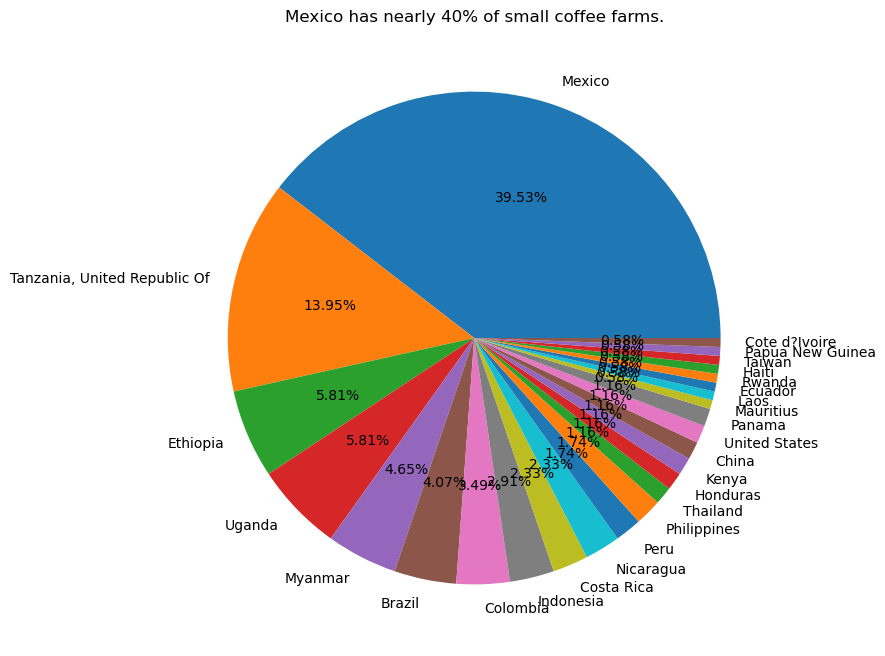

In [36]:
plt.figure(figsize=(10, 8))
plt.pie(countries_one_coffee_owners, labels = countries_one_coffee_owners.index, autopct="%.2f%%")
plt.title("Mexico has nearly 40% of small coffee farms.")
plt.show()

Mexico has many owners ~40% who produced only one coffee.

In [37]:
coffee_data[~coffee_data.owner.isin(one_coffee_owners_names)]["country_of_origin"].value_counts()

country_of_origin
Guatemala                       181
Colombia                        177
Mexico                          168
Brazil                          125
Taiwan                           74
United States (Hawaii)           73
Honduras                         51
Costa Rica                       47
Ethiopia                         34
Thailand                         30
Uganda                           26
Kenya                            23
Nicaragua                        22
El Salvador                      21
Tanzania, United Republic Of     16
Indonesia                        15
China                            14
India                            14
Malawi                           11
United States                     8
Vietnam                           8
Peru                              7
Haiti                             5
United States (Puerto Rico)       4
Philippines                       2
Panama                            2
Laos                              2
Burundi   

Mexico has many owners (168) who produced more than one coffee.

## Correlation analysis:

In [38]:
rating_columns = ['aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness']

In [39]:
coffee_data[rating_columns].corr() # returns pearson correlation coefficient

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness
aroma,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.366578,0.335684,0.253493
flavor,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.410923,0.396958,0.291065
aftertaste,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.401456,0.386665,0.266409
acidity,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.375383,0.300927,0.261854
body,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.326879,0.276587,0.268342
balance,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.400915,0.370341,0.283272
uniformity,0.366578,0.410923,0.401456,0.375383,0.326879,0.400915,1.000000,0.526219,0.451083
clean_cup,0.335684,0.396958,0.386665,0.300927,0.276587,0.370341,0.526219,1.000000,0.440644
sweetness,0.253493,0.291065,0.266409,0.261854,0.268342,0.283272,0.451083,0.440644,1.000000


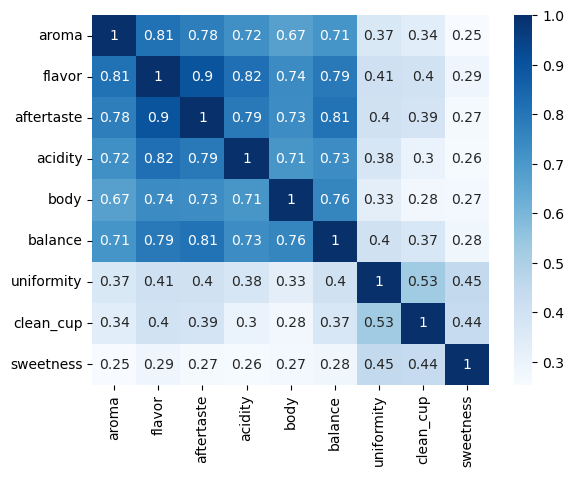

In [40]:
sns.heatmap(coffee_data[rating_columns].corr(), annot = True, cmap = plt.cm.Blues) # plot correlation matrix
plt.show()

In [41]:
coffee_data[rating_columns].corr("spearman") 

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness
aroma,1.000000,0.715414,0.668453,0.614898,0.561393,0.615313,0.121619,0.169010,-0.014172
flavor,0.715414,1.000000,0.809152,0.744695,0.670422,0.725580,0.168478,0.206467,0.010144
aftertaste,0.668453,0.809152,1.000000,0.697735,0.678106,0.753583,0.167086,0.185766,-0.022423
acidity,0.614898,0.744695,0.697735,1.000000,0.617025,0.661565,0.114920,0.118772,-0.023225
body,0.561393,0.670422,0.678106,0.617025,1.000000,0.698753,0.044112,0.081132,-0.090430
balance,0.615313,0.725580,0.753583,0.661565,0.698753,1.000000,0.134661,0.153227,-0.044265
uniformity,0.121619,0.168478,0.167086,0.114920,0.044112,0.134661,1.000000,0.625821,0.404029
clean_cup,0.169010,0.206467,0.185766,0.118772,0.081132,0.153227,0.625821,1.000000,0.424389
sweetness,-0.014172,0.010144,-0.022423,-0.023225,-0.090430,-0.044265,0.404029,0.424389,1.000000


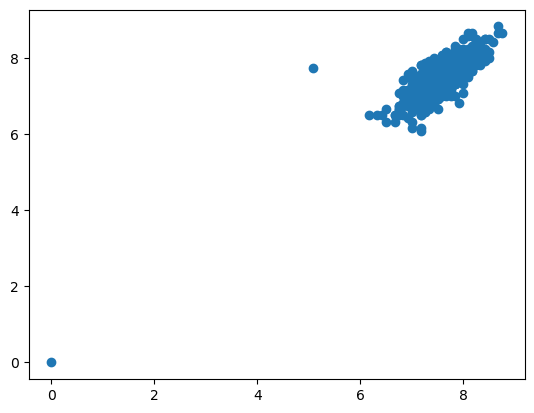

In [42]:
plt.scatter(coffee_data.aroma, coffee_data.flavor)
plt.show()

In [43]:
# shows entry that has values = 0:
coffee_data[(coffee_data.aroma == 0) | (coffee_data.flavor == 0)]

,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1310,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,comayagua,...,Green,2,"April 28th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0


In [44]:
# shows entries that hasn't values = 0:
not_zero_coffee_data = coffee_data[~(coffee_data.aroma == 0) & ~(coffee_data.flavor == 0)]

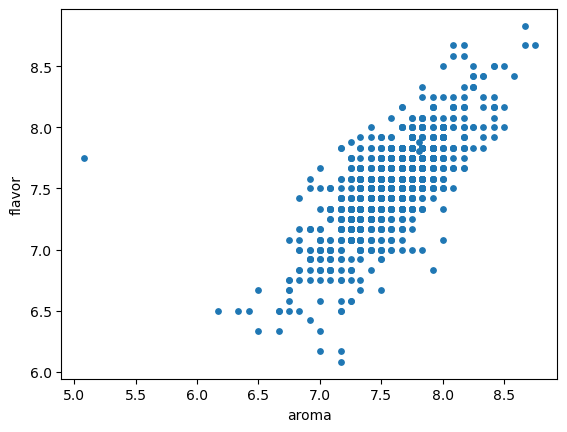

In [45]:
plt.scatter(not_zero_coffee_data.aroma, not_zero_coffee_data.flavor, s = 15, marker = "o")
plt.xlabel("aroma")
plt.ylabel("flavor")
plt.show()

In [46]:
coffee_data[["aroma", "flavor"]].corr("spearman") 

,aroma,flavor
aroma,1.000000,0.715414
flavor,0.715414,1.000000


In [47]:
coffee_valid_harvest_years = coffee_valid_harvest_years[
        ~(coffee_valid_harvest_years.aroma == 0) &
         ~(coffee_valid_harvest_years.flavor == 0)
]

In [48]:
# shows mean of flavor ratings grouped by year:
flavor_mean_by_year = coffee_valid_harvest_years.groupby("harvest_year").flavor.mean()
flavor_mean_by_year

harvest_year
2010    7.701000
2011    7.734231
2012    7.459011
2013    7.495414
2014    7.537039
2015    7.595194
2016    7.552984
2017    7.535507
2018    7.420000
Name: flavor, dtype: float64

In [49]:
flavor_max_by_year = coffee_valid_harvest_years.groupby("harvest_year").flavor.max()
flavor_min_by_year = coffee_valid_harvest_years.groupby("harvest_year").flavor.min()

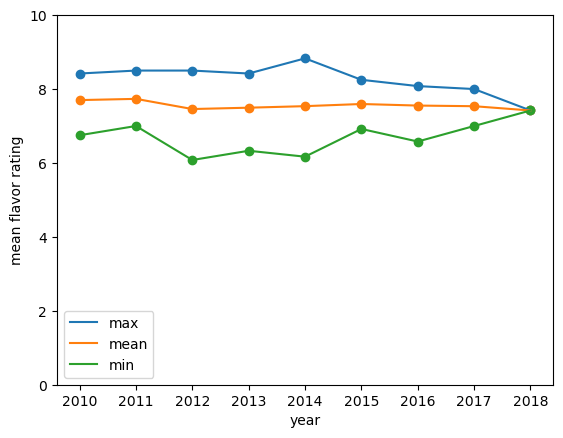

In [50]:
plt.plot(flavor_max_by_year, label = "max")
plt.plot(flavor_mean_by_year, label = "mean")
plt.plot(flavor_min_by_year, label = "min")

plt.scatter(flavor_max_by_year.index, flavor_max_by_year)
plt.scatter(flavor_mean_by_year.index, flavor_mean_by_year)
plt.scatter(flavor_min_by_year.index, flavor_min_by_year)

plt.ylim(0, 10)
plt.xlabel("year")
plt.ylabel("mean flavor rating")
plt.legend()
plt.show()

The graph show that the best coffee flavor was achieved in 2014. The worst coffee flavor was acheived in 2012